In [1]:
from enum import Enum
import pandas as pd
import seaborn as sns
from util import gather_dataset

In [2]:
class ClaimantType(Enum):
    named_individual = 1
    named_individual_with_role = 2
    role_or_profession_without_further_specifications = 3
    collective_expression = 4
    collective_role = 5
    inanimate_and_generic_object = 6

In [3]:
claimant_df = pd.read_csv('./annotations/claimant_annotations.csv')
claimant_df = claimant_df.drop('Unnamed: 0', axis=1)

# parse types into enum values
claimant_df['ClaimantType'] = claimant_df['ClaimantType'].apply(lambda type_: ClaimantType(int(type_.lstrip()[0]))) #type: ignore

claimant_df.head()

,task_id,source,ClaimantType
0,f79dff90-7723-4c33-9582-33e46ab6176c,"Maimuna Majumder , a research fellow at Boston...",ClaimantType.named_individual_with_role
1,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,The article,ClaimantType.inanimate_and_generic_object
2,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,Dr. Cherry,ClaimantType.named_individual_with_role
3,edf664b7-4b4b-4eca-8bfb-dbb814528de7,My vet friend,ClaimantType.role_or_profession_without_furthe...
4,cca66bf3-17a3-4c5d-8a91-ce303c7bc5a0,People in the middle ages,ClaimantType.collective_expression


ClaimantType
ClaimantType.inanimate_and_generic_object                         1072
ClaimantType.collective_role                                       468
ClaimantType.named_individual                                      399
ClaimantType.named_individual_with_role                            238
ClaimantType.role_or_profession_without_further_specifications     140
ClaimantType.collective_expression                                 133
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of Reliability Scores'}, xlabel='ClaimantType'>

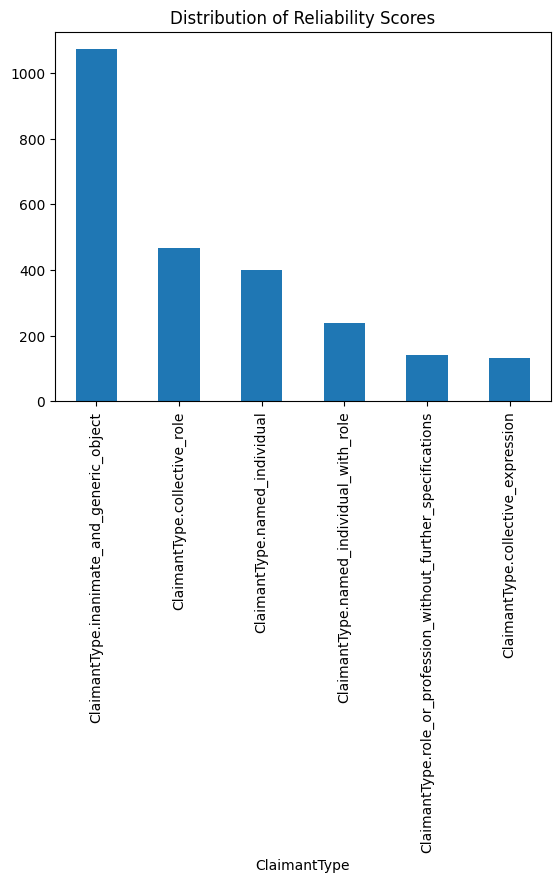

In [4]:
print(claimant_df['ClaimantType'].value_counts())

claimant_df['ClaimantType'].value_counts().plot(kind='bar', title='Distribution of Reliability Scores')

In [5]:
# load dataset
df = gather_dataset('./data/claimant_data_processed/')
df.head()

,worker_id,task_id,task_response_id,file_id,sentence,tokens_id,publisher,source,reliability,Optional Comments:,batch_no,score
0,23QWQCPZ7PNP,f79dff90-7723-4c33-9582-33e46ab6176c,15d3b8d0-d17f-49b2-bb2f-c113957cddf7,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
1,9R3XRNAAW7RR,f79dff90-7723-4c33-9582-33e46ab6176c,1bb0a245-1455-4ce7-8704-7e00c2b00d29,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",3 - The source is potentially reliable,NaN,1,3
2,9R3XRNAAW7RR,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,2c7856c7-0bc6-4f40-9781-37b6942a2e36,PublicHealth-org_20170623T200727.conll.annot,14,1 2,PublicHealth.org,The article,5 - The source is fully reliable,NaN,1,5
3,MWHG9Y6DNGR9,f79dff90-7723-4c33-9582-33e46ab6176c,e2b709b8-16f3-4bc4-b513-8c2f28f0f1e1,ThinkProgress_20160723T110700.conll.annot,12,22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 3...,ThinkProgress,"Maimuna Majumder , a research fellow at Boston...",5 - The source is fully reliable,NaN,1,5
4,D7HVJTEKMYNW,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,f16d6d05-ab57-4117-85b5-8c87fcd5a689,National-Vaccine-Information-Center-(NVIC)_201...,26,5 6,National Vaccine Information Center (NVIC),Dr. Cherry,5 - The source is fully reliable,NaN,1,5


In [6]:
# merge with annotations
publisher_df = pd.read_csv('./annotations/publisher_annotations.csv')

joint_df = pd.merge(df, claimant_df, on='task_id')
joint_df = pd.merge(joint_df, publisher_df, on='publisher')

joint_df = joint_df[['task_id', 'ClaimantType', 'category']]
joint_df = joint_df.rename(columns={'ClaimantType': 'claimant_type', 'category': 'publisher_type'}) #type:ignore

joint_df['claimant_type'] = joint_df['claimant_type'].apply(lambda claimant_type: claimant_type.name.replace('_', ' '))

joint_df.head()

,task_id,claimant_type,publisher_type
0,f79dff90-7723-4c33-9582-33e46ab6176c,named individual with role,not established
1,f79dff90-7723-4c33-9582-33e46ab6176c,named individual with role,not established
2,f040bde3-4c11-482c-b7e3-4bd080b1a7f7,inanimate and generic object,established
3,f79dff90-7723-4c33-9582-33e46ab6176c,named individual with role,not established
4,e3f62e34-fb40-4bda-a5b4-acd3d72c1160,named individual with role,governmental/institutional


<Axes: xlabel='publisher_type', ylabel='claimant_type'>

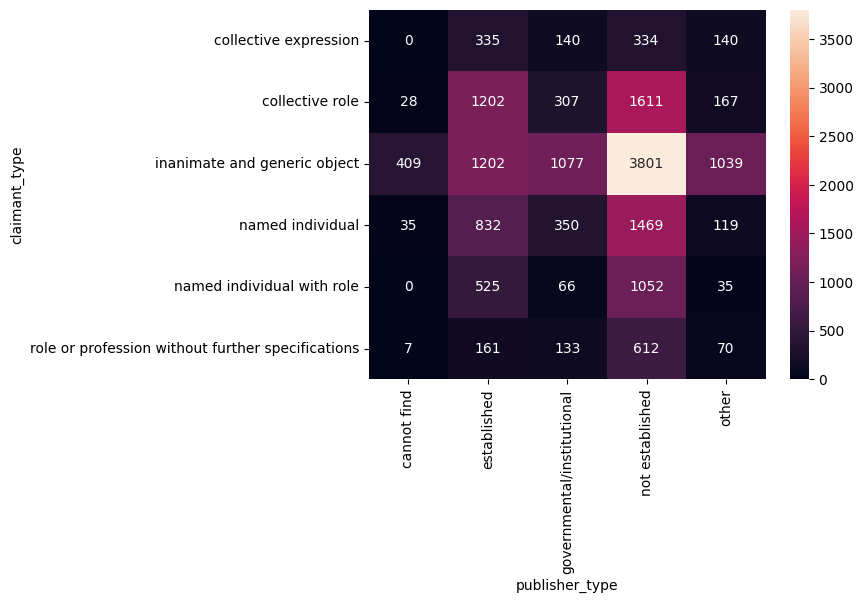

In [7]:
# heatmap with publisher and claimant categories
crosstab = pd.crosstab(joint_df['claimant_type'], joint_df['publisher_type'])
sns.heatmap(crosstab, annot=True, fmt='.0f')